In [99]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Jury Panels

What is the probability of getting the actual panel w/ 8/100 black jurors?

1) Start w/ distributions of eligible jurors and actual panel
2) Draw panels at random from the eligible jurors
3) See if the panel is actually likely

In [100]:
# Step 1: distributions of population and sample
swain = Table().with_columns(
    'Ethnicity', make_array('Black','Other'),
    'Eligible', make_array(0.26,0.74),
    'Panel', make_array(0.08,0.92)
)

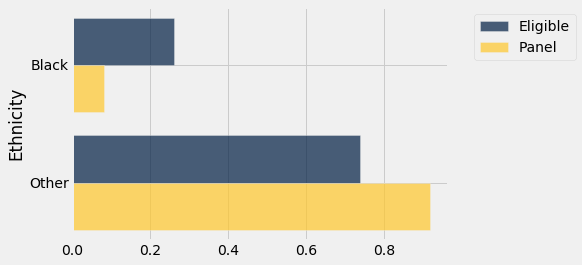

In [101]:
swain.barh(0)

In [102]:
def total_variation_distance(dist1,dist2):
    return sum(abs(dist1-dist2)) / 2

# TVD between eligible jurors and our panel
tvd = total_variation_distance(swain.column(1), swain.column(2))
tvd

0.18000000000000002

In [103]:
pop_dist = swain.column('Eligible')
pop_dist

array([0.26, 0.74])

In [104]:
ethnicities = swain.select(0)
ethnicities.sample(10,weights=pop_dist)

Ethnicity
Black
Black
Other
Other
Other
Other
Other
Other
Other
Other


In [105]:
#2) Draw panels at random from the eligible jurors

def random_jury_panel():
    sample_panel = ethnicities.sample(100,weights=pop_dist).group('Ethnicity')
    counts = sample_panel.column('count')
    proportions = counts / 100
    with_random = swain.with_column('Random', proportions)
    return with_random


In [106]:
random_jury_panel()

Ethnicity,Eligible,Panel,Random
Black,0.26,0.08,0.18
Other,0.74,0.92,0.82


In [107]:
repetitions = 1000
tvds = make_array()

for i in np.arange(repetitions):
    new_sample = random_jury_panel()
    tvds = np.append(tvds,total_variation_distance(new_sample.column(1),new_sample.column(3)))

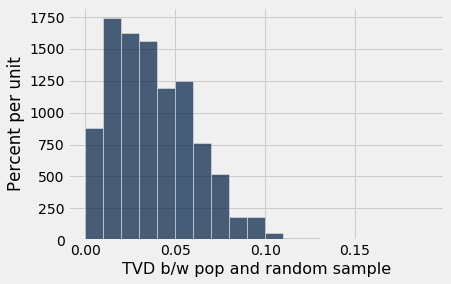

In [108]:
Table().with_column('TVD b/w pop and random sample',tvds).hist(bins=np.arange(0,0.2,0.01))

In [109]:
# what was the original TVD? 
tvd

0.18000000000000002

# Mendel's Pea Flowers

In [110]:
null = make_array('Purple','Purple','Purple','White')
null

array(['Purple', 'Purple', 'Purple', 'White'], dtype='<U6')

In [111]:
sample = np.random.choice(null,10)
sample

array(['White', 'White', 'Purple', 'Purple', 'Purple', 'Purple', 'Purple',
       'White', 'Purple', 'Purple'], dtype='<U6')

In [112]:
def test_statistic(sample):
    prop_purple = abs(np.count_nonzero(sample == 'Purple') / len(sample) - 0.75)
    return prop_purple

# the higher it is, the more different it is from the theoretical

In [113]:
# run until we have samples w/ lots of purple and lots of whites
sample = np.random.choice(null,10)
test_statistic(sample)

0.050000000000000044

In [114]:
# Mendel's observation
total_plants = 929
observed = 705 /  total_plants # were purple
observed

# Question: does this observed rate fit the null hypothesis?

0.7588805166846071

In [115]:
observed_statistic = abs(observed - 0.75)
observed_statistic

0.008880516684607098

In [116]:
repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    sample_stat = test_statistic(np.random.choice(null,total_plants))
    sample_stats = np.append(sample_stats,sample_stat)

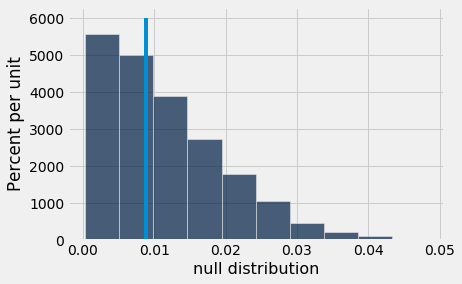

In [117]:
null_dist = Table().with_columns('null distribution',sample_stats)
null_dist.hist()

_ = plots.plot([observed_statistic, observed_statistic],[0,60])

In [118]:
# it looks like typical values fall between 0 and 0.35 if mendel's model was correct
# and we draw plants at random

# what is 'good enough'? how far could we move that blue line over and still
# think that we had a good fit?

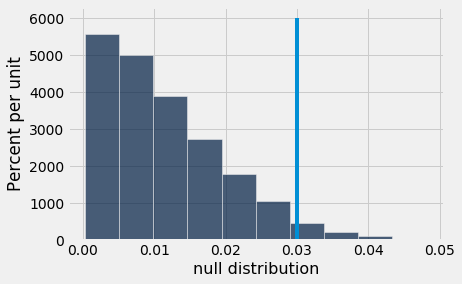

In [119]:
our_observations = 0.03
null_dist.hist()

_ = plots.plot([our_observations, our_observations],[0,60])

In [120]:
# Do I accept or reject that this observation fit the proposed model?

In [121]:
# What are the proportion of values that are above my line?
sample_stats

array([0.01587729, 0.00349839, 0.0121098 , ..., 0.01426265, 0.01533907,
       0.00457481])

In [122]:
# the % of results that are > (worse) than mendel's observed stat
np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)


0.5442

In [123]:
# the % of results that are > (worse) than OUR's observed stat
np.count_nonzero(sample_stats >= our_observations) / len(sample_stats)
# this is the chance of getting my result or worse under the null hypothesis
# if things are truly randomly drawn in a 3:1 ratio, there's only a 3% chance of 
# getting our observation

# this is a p-value

0.0328

In [124]:
# Discussion of no absolute value
orig_p_value = np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)
orig_p_value

0.5442

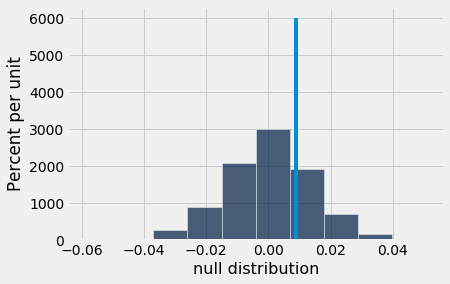

In [125]:
def new_test_statistic(sample):
    prop_purple = np.count_nonzero(sample == 'Purple') / len(sample) - 0.75
    return prop_purple

repetitions = 5000
sample_stats = make_array()

for i in np.arange(repetitions):
    sample_stat = new_test_statistic(np.random.choice(null,total_plants))
    sample_stats = np.append(sample_stats,sample_stat)

null_dist = Table().with_columns('null distribution',sample_stats)
null_dist.hist()

_ = plots.plot([observed_statistic, observed_statistic],[0,60])

In [127]:
# now compute the p-value
new_p_value = np.count_nonzero(sample_stats >= observed_statistic) / len(sample_stats)
new_p_value

0.2832